# chaotic attractor reconstruction

http://node99.org/tutorials/ar/

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy 
import seaborn as sns

In [3]:
# Fourth-order Runge-Kutta integrator. 
# To obtain the next state of a dynamical system given 
# its current state and its ODEs, we need to integrate 
# over time t.
def rk4(odes, state, parameters, dt=0.01):
    k1 = dt * odes(state, parameters)
    k2 = dt * odes(state + 0.5 * k1, parameters)
    k3 = dt * odes(state + 0.5 * k2, parameters)
    k4 = dt * odes(state + k3, parameters)
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6


# Generate a trajectory given a set of ODEs:
def generate(data_length, odes, state, parameters):
    data = numpy.zeros([state.shape[0], data_length])
    
    # Burn-out period - to make the ode system stable?
    for i in xrange(5000):
        state = rk4(odes, state, parameters)

    for i in xrange(data_length):
        state = rk4(odes, state, parameters)
        data[:, i] = state

    return data

# The following are two ODE's

# Define the Lorenz equations (ODE)
def lorenz_odes((x, y, z), (sigma, beta, rho)):
    return numpy.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])

def lorenz_generate(data_length):
    return generate(data_length, lorenz_odes, \
        numpy.array([-8.0, 8.0, 27.0]), numpy.array([10.0, 8/3.0, 28.0]))

# Define the Rössler equations (Another ODE)
def rossler_odes((x, y, z), (a, b, c)):
    return numpy.array([-y - z, x + a * y, b + z * (x - c)])

def rossler_generate(data_length):
    return generate(data_length, rossler_odes, \
        numpy.array([10.0, 0.0, 0.0]), numpy.array([0.15, 0.2, 10.0]))


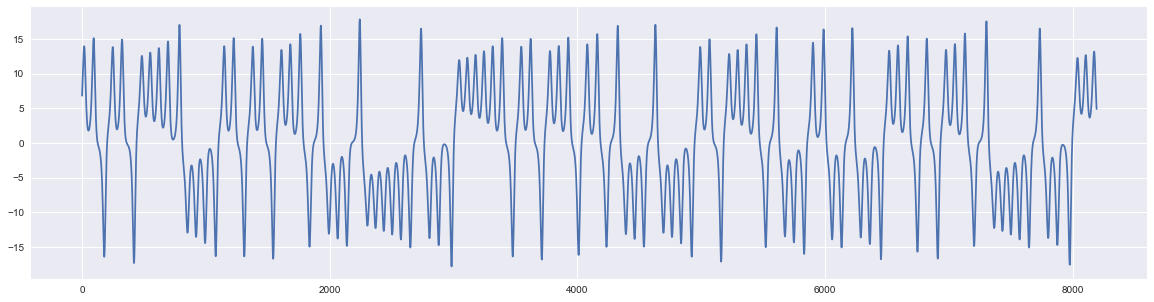

In [8]:
# A time series from the first Lorenz equation is simple to plot:
data = lorenz_generate(2**13)
fig = plt.figure(figsize=(20, 5))
plt.plot(data[0])

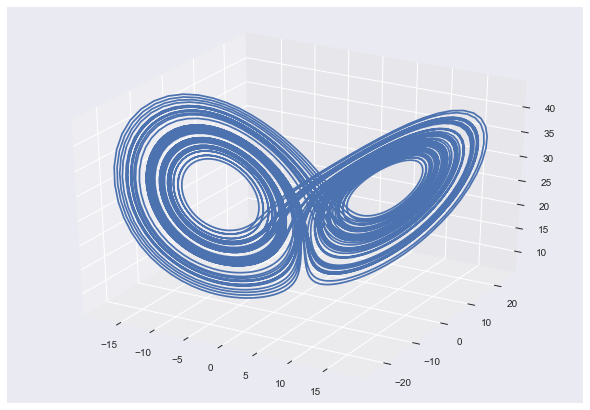

In [10]:
# Lorenz attractor
from mpl_toolkits.mplot3d.axes3d import Axes3D

figure = plt.figure()
axes = Axes3D(figure)
axes.plot3D(data[0], data[1], data[2])
figure.add_axes(axes)

## Time delay embedding

Takens' Embedding Theorem explains how the phase space of an attractor can be reconstructed using time-delayed measurements of a single variable. Delaying the time series produced by a single ODE creates a higher dimensional embedding and, by Takens' Embedding Theorem, allows the phase space of the attractor to be reconstructed.

If the measurement variable at time $t$ is defined by $x(t)$, an $(n+1)$-dimensional embedding of the measurement variable is defined by:

$$
[x(t), x(t + \tau), \dots, x(t + n \tau)]
$$

In [11]:
# create time series
data = lorenz_generate(2**14)[0]

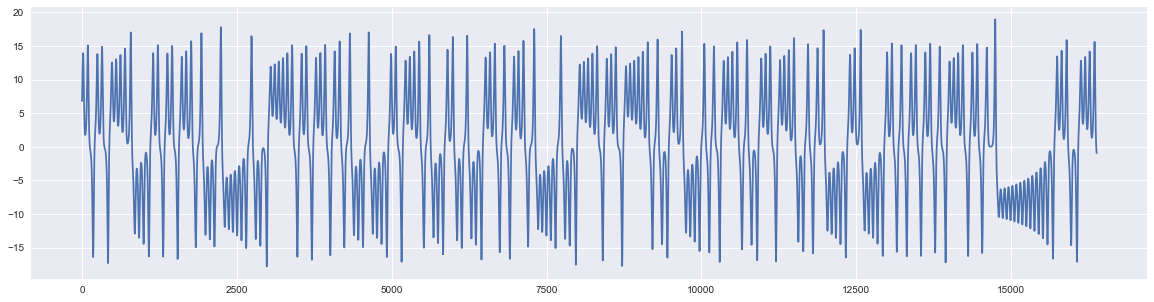

In [15]:
fig = plt.figure(figsize=(20,5))
plt.plot(data)

In [18]:
numpy.preprocess

AttributeError: 'module' object has no attribute 'preprocess'